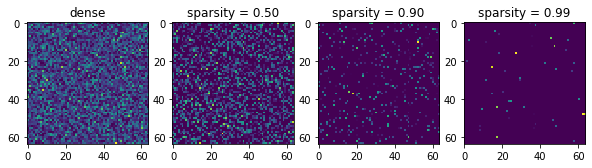

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np

def sparse(sparsity, size = (64, 64), symetrical = False, diagonal = False):
    m = torch.rand(size)

    m = (m > sparsity) * torch.randn(size)
    if symetrical:
        m = m + m.t()
    if diagonal:
        m += torch.eye(m.shape[0])
    m = m.abs()
    
    return m



# Create a figure large enough
figure = plt.figure(figsize=(10, 3))
axarr = figure.subplots(1, 4)

for i, sparsity in enumerate([0, 0.5, 0.9, 0.99]):
    m = sparse(sparsity)
    axarr[i].imshow(m)
    title = "dense" if sparsity == 0 else "sparsity = %0.2f" % sparsity
    axarr[i].set_title(title)

    
figure.savefig("sparse.png", dpi=200)



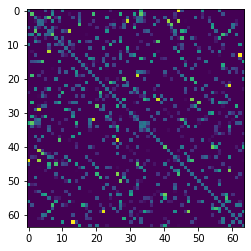

In [4]:
figure = plt.figure(figsize=(4, 4))
fe = sparse(0.9, symetrical = True, diagonal = True)
plt.imshow(fe)
#plt.title("Typical finite elements matrix")
plt.savefig("finite_elements.png", dpi=100)



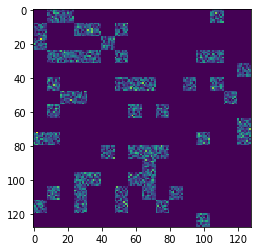

In [5]:
def block_mask(sparsity, size = (64, 64), block_size = 8):
    assert((size[0] % block_size) == 0)
    assert((size[1] % block_size) == 0)
    m = torch.rand(((size[0] // block_size), size[1] // block_size))

    m = (m > sparsity).float().numpy()
        
    m = np.repeat(np.repeat(m, repeats=block_size, axis=0), repeats=block_size, axis = 1)
    return m
    
    
bm = block_mask(0.8, size = (128, 128), block_size = 8)
m = sparse(0.0, size = (128, 128)).pow(0.85)
m *= bm
plt.imshow(m)
plt.savefig("block_sparse.png", dpi=100, bbox_inches='tight', pad_inches=0)

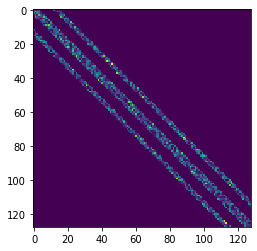

In [6]:
def banded(size, bands):
    r = torch.zeros(size)
    m = sparse(0.0, size)
    for b in bands:
        n = torch.triu(m, b[0])
        n = torch.tril(n, b[1])
        r += n
    return r
    
b = banded((128, 128), [(-3, 3), (12, 15), (-15, -12)]) # (-5, 5), 
plt.imshow(b)
plt.savefig("band_matrix.png", dpi=100, bbox_inches='tight', pad_inches=0)

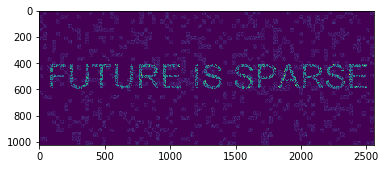

In [7]:
def text_image(text, size, font_size, offset):
    from PIL import Image, ImageDraw, ImageFont

    # make a blank image for the text, initialized to transparent text color
    txt = Image.new('L', size, 0)

    # get a font
    fnt = ImageFont.truetype('Arial.ttf', int(font_size))
    # get a drawing context
    d = ImageDraw.Draw(txt)

    # draw text, full opacity
    d.text(offset, text, font=fnt, fill=255)
    
    txt = torch.tensor(np.asarray(txt, dtype=np.uint8)).float()
    return txt

scale = 2
size = (int(1280 * scale), int(512 * scale))
offset = (30 * scale, 360)
ti = text_image("FUTURE IS SPARSE", size, int(128 * scale), offset)
ti = ti * sparse(0.25, (size[1], size[0])).sqrt() 
ti += sparse(0.0, (size[1], size[0])) * 40 * block_mask(0.75, size = (size[1], size[0]), block_size = 32)
ti = ti.abs()

plt.imshow(ti)
plt.savefig("header.png", dpi=200, bbox_inches='tight', pad_inches=0)